# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import pandas as pd
import numpy.linalg as LA
import wget
import os
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Obtain the data file

In [2]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        wget.download("https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv")
else:
    print("Either the file is missing or not readable, download it")
    wget.download("https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv")

File already exists
File is readable


In [3]:
# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

***Play with data***

In [4]:
df.shape
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [5]:
# Sostituisci i valori 0 solo nelle colonne numeriche con la media della colonna
df[numeric_columns] = df[numeric_columns].replace(to_replace=0.0, value=df[numeric_columns].mean())
df
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [6]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [7]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [8]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [9]:
#df_one = np.invert(pd.get_dummies(df_sel["State"]))
df_one = pd.get_dummies(df_sel["State"])
df_one = df_one.astype(int)

In [10]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [11]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


In [12]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [13]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [14]:
def min_max_scale(ds):
    xmax = max(ds)
    xmin = min(ds)
    xscaled = [(x - xmin) / (xmax - xmin) for x in ds]
    return xscaled

In [15]:

def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [16]:
#Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [17]:
# for col in df_fin.columns:
#     df_fin[col] = min_max_scale(df_fin[col])

In [18]:
df_fin["State"] = df_fin["State"].astype(int)
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,1.000000,0.828805,1.000000,1.000000
2,0,0.943688,0.553781,0.918982,0.996133
4,0,0.873981,0.500378,0.824892,0.866501
6,1,0.827905,0.805926,0.287716,0.814020
7,0,0.801353,0.796789,0.729619,0.812091


In [19]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [20]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


Train the Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs', fit_intercept=False).fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)

***Plot results***

C:\Users\abdul\AppData\Local\Temp\ipykernel_24364\1014927415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="State", data =df_fin, palette='rocket')


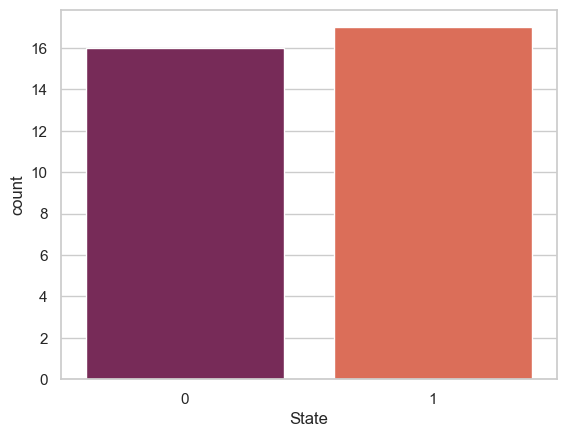

<Figure size 640x480 with 0 Axes>

In [24]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x="State", data =df_fin, palette='rocket')
plt.savefig("count_plot")
plt.show()
plt.savefig("count_plot")

In [25]:
n_l0 = len(df_fin[df_fin["State"] == 0])
n_l1 = len(df_fin[df_fin["State"] == 1])
p_l0 = n_l0/(n_l0+n_l1)
print("percentage of label equal to 0", p_l0*100)
p_l1 = n_l1/(n_l0+n_l1)
print("percentage of label equal to 1", p_l1*100)

percentage of label equal to 0 48.484848484848484
percentage of label equal to 1 51.515151515151516


In [26]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,1.000000,0.828805,1.000000,1.000000
2,0,0.943688,0.553781,0.918982,0.996133
4,0,0.873981,0.500378,0.824892,0.866501
6,1,0.827905,0.805926,0.287716,0.814020
7,0,0.801353,0.796789,0.729619,0.812091


C:\Users\abdul\AppData\Local\Temp\ipykernel_24364\4083438239.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


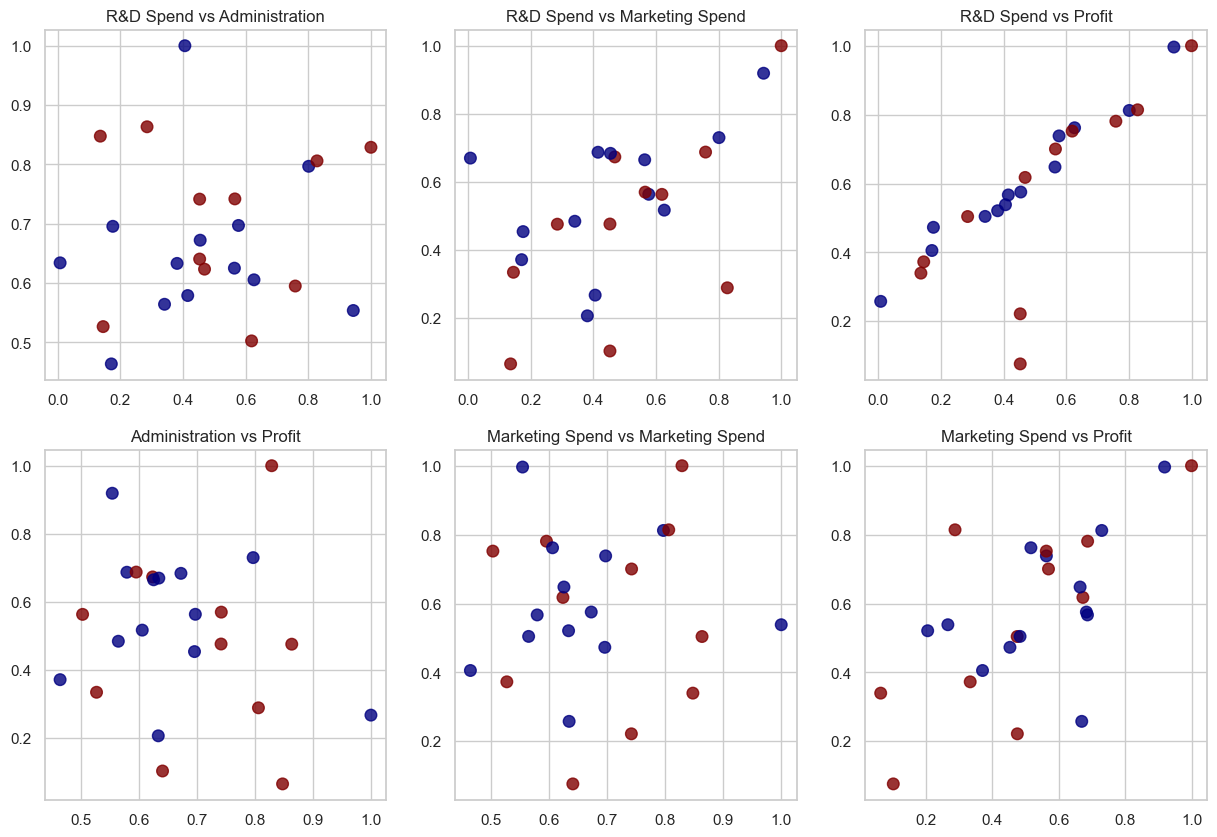

In [27]:
# fig = px.scatter_matrix(df_fin,
#     dimensions=list(df_fin.columns)[1:],
#     color="State")
# fig.show()

fig, axs = plt.subplots(2, 3)
col = list(df_fin.columns)
axs[0, 0].scatter(X_train[:, 0], X_train[:, 1], s=70, c=y_train, cmap="jet", alpha=0.8, )
axs[0, 0].set_title(col[1] + ' vs ' + col[2])
axs[0, 1].scatter(X_train[:, 0], X_train[:, 2], s=70, c=y_train, alpha=0.8, cmap="jet")
axs[0, 1].set_title(col[1] + ' vs ' + col[3])
axs[0, 2].scatter(X_train[:, 0], X_train[:, 3], s=70, c=y_train, alpha=0.8, cmap="jet")
axs[0, 2].set_title(col[1] + ' vs ' + col[4])
axs[1, 0].scatter(X_train[:, 1], X_train[:, 2], s=70, c=y_train, alpha=0.8, cmap="jet")
axs[1, 0].set_title(col[2] + ' vs ' + col[4])
axs[1, 1].scatter(X_train[:, 1], X_train[:, 3], s=70, c=y_train, alpha=0.8, cmap="jet")
axs[1, 1].set_title(col[3] + ' vs ' + col[3])
axs[1, 2].scatter(X_train[:, 2], X_train[:, 3], s=70, c=y_train, alpha=0.8, cmap="jet")
axs[1, 2].set_title(col[3] + ' vs ' + col[4])

fig.set_size_inches(15,10)
fig.show()
fig.savefig(fname="scatterplot")

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

***Logistic regression without regularization***

In [28]:
def sigmoidM(X, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    y = 1/(1+np.exp(-np.matmul(X,w)))
    return y

In [29]:
def LogisticLoss(X, labels, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]
    cost = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w)))
    return cost

def GDLogistic(X, labels, iter, gamma, w_):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    d = np.shape(X)  # d contains the shape of X, which is a tuple (n, d)
    cost = np.zeros(iter)  # Create an array to store the cost at each iteration
    w = w_
    W = np.zeros((d[1], iter))  # Create an array to store the weight vectors at each iteration
    for i in range(iter):
        W[:, i] = w  # Store the current weight vector in the W array
        # Update the weight vector using gradient descent
        w = w - (gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels))
        # Compute and store the logistic loss for the current weight vector
        cost[i] = LogisticLoss(X, labels, w)

    return W, cost

***Logistic regression with RIDGE regularization***

In [30]:
def RidgeLogLoss(X, labels, w, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    w : array of float of dim d
        Weights of the fitted line
    lam : float
        Weight of the L2 penalty term
    """
    n = np.shape(X)[0]
    cost = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + lam*np.dot(w,w)
    return cost

In [31]:
def GDRidgeLogistic(X, labels, iter, gamma, lam, w_):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    lam : float
        Weight of the penalty term
    """
    d = np.shape(X)  # d contains the shape of X, which is a tuple (n, d)
    cost = np.zeros(iter)  # Create an array to store the cost at each iteration
    w = w_
    W = np.zeros((d[1], iter))  # Create an array to store the weight vectors at each iteration
    for i in range(iter):
        W[:, i] = w  # Store the current weight vector in the W array
        # Update the weight vector using gradient descent
        w = w - (gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels) + 2*lam*w)
        # Compute and store the logistic loss for the current weight vector
        cost[i] = RidgeLogLoss(X, labels, w, lam)

    return W, cost

***Logistic regression with LASSO regularization***

In [32]:
def LassoLogLoss(X, labels, w, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    w : array of float of dim d
        Weights of the fitted line
    lam : float
        Weight of the L1 penalty term
    """
    n = np.shape(X)[0]
    cost = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + lam*np.sum(np.abs(w))
    return cost

def L1_subgradient(z):
    """
    Compute the subgradient of the absolute value function element-wise.

    Parameters:
    ----------
    z : array-like
        Input array for which the subgradient is calculated.

    Returns:
    ----------
    g : array-like
        Subgradient of the absolute value function applied element-wise to `z`.
    """
    # Create an array g of the same shape as z, initialized with all 1s.
    g = np.ones(z.shape)

    # Check each element of z.
    for i in range(z.shape[0]):
    # If the element is negative, set the corresponding element in g to -1.
       if z[i] < 0.:
          g[i] = -1.0
    # If the element is zero, set the corresponding element in g to 0.
       elif z[i] == 0.:
         g[i] = 0.0


    # Return the resulting array g, representing the subgradient.
    return g

def LassoGradient(w, lam):
    return lam * L1_subgradient(w)

In [38]:
def GDLassoLogistic(X, labels, iter, gamma, lam, w_):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    lam : float
        Weight of the penalty term
    """
    d = np.shape(X)  # d contains the shape of X, which is a tuple (n, d)
    cost = np.zeros(iter)  # Create an array to store the cost at each iteration
    w = w_
    print(w.shape)
    W = np.zeros((d[1], iter))  # Create an array to store the weight vectors at each iteration
    print(W.shape)
    for i in range(iter):
        W[:, i] = w  # Store the current weight vector in the W array
        # Update the weight vector using gradient descent
        w = w - (gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels) + LassoGradient(w, lam))
        # Compute and store the logistic loss for the current weight vector
        cost[i] = LassoLogLoss(X, labels, w, lam)

    return W, cost

(4,)
(4,)
(4, 750)


C:\Users\abdul\AppData\Local\Temp\ipykernel_24364\2371911406.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


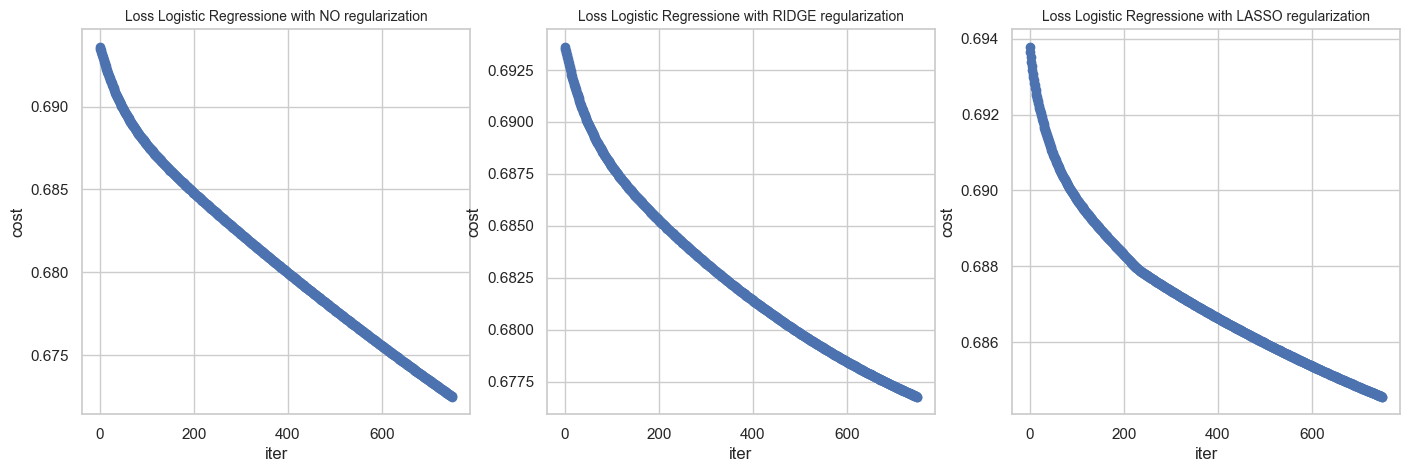

In [39]:
iter = 750
gamma = 0.031
lam = 0.01

np.random.seed(1234)
#np.random.seed(666)
w = np.random.uniform(0, 0.01, np.shape(X_train)[1])  # Initialize w with random values
print(w.shape)
#w = np.zeros(np.shape(X_train)[1])  # Initialize w with random values

W_, cost_ = GDLogistic(X_train, y_train, iter, gamma, w)
WR, costR = GDRidgeLogistic(X_train, y_train, iter, gamma, lam, w)
WL, costL = GDLassoLogistic(X_train, y_train, iter, gamma, lam, w)

costs = [["NO", cost_], ["RIDGE", costR], ["LASSO", costL]]

fig, axs = plt.subplots(1, 3)

for ax, cost in zip(axs, costs):
    ax.plot(cost[1], 'o', ls='-')
    ax.set_xlabel("iter")
    ax.set_ylabel("cost")
    ax.set_title(f"Loss Logistic Regressione with {cost[0]} regularization")
    ax.title.set_size(10)
fig.set_size_inches(17,5)
fig.show()
fig.savefig("Loss_plots")

In [36]:
print(f"w_ : {W_[:,iter-1]}\nwR : {WR[:,iter-1]}\nwL : {WL[:, iter-1]}\nLR : {LR.coef_[0]}")
pd.DataFrame([W_[:,iter-1], WR[:,iter-1], WL[:,iter-1], LR.coef_[0]])

w_ : [ 0.33569773  0.12552149 -0.46952374 -0.2674722 ]
wR : [ 0.33211736  0.12384625 -0.46559575 -0.26546418]
wL : [ 0.32537269  0.12018465 -0.46199446 -0.25964272]
LR : [ 0.33946518  0.11921608 -0.43943845 -0.26236414]


,0,1,2,3
0,0.335698,0.125521,-0.469524,-0.267472
1,0.332117,0.123846,-0.465596,-0.265464
2,0.325373,0.120185,-0.461994,-0.259643
3,0.339465,0.119216,-0.439438,-0.262364


***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [37]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)
print(y_pred)
target_names = ['Florida', 'California']
print(classification_report(y_true, y_pred, target_names=target_names))

[0 1 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

     Florida       0.38      1.00      0.55         3
  California       1.00      0.17      0.29         6

    accuracy                           0.44         9
   macro avg       0.69      0.58      0.42         9
weighted avg       0.79      0.44      0.37         9



In [38]:
def get_conf_matrix(y_pred, y_true):
    """ Return the confusion matrix
    
    y_pred (int): array 1 x d
        predicted label
        
    y_true: array 1 x d
        true label
        
    return (array 3 x 3 int) 
    """  
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for yt, yp in zip(y_true, y_pred):
        if yp == yt:
            if yp == 1:
                tp += 1
            else:
                tn += 1
        else:
            if yp == 1:
                fp += 1
            else:
                fn += 1
    
    conf_matrix = [
        [len(y_true), tp+fp, fn+tn],
        [tp+fn, tp, fn],
        [fp+tn, fp, tn]]

    return np.array(conf_matrix)

def predict(X, w, th=0.5):
    y_pred = sigmoidM(X, w)
    return y_pred >= th
    

def weird_division(n, d):
    return n / d if d else 0

In [39]:
w_=W_[:,iter-1]
wR = WR[:,iter-1]
wL = WL[:,iter-1]

In [40]:
if np.sum(y_test) > (len(y_test)/2):
    y_blm = np.ones(len(y_test))
else:
    y_blm = np.zeros(len(y_test))

yLR = predict(X_test, LR.coef_[0])
y_pred_no_reg = predict(X_test, w_)
y_pred_ridge = predict(X_test, wR)
y_pred_lasso = predict(X_test, wL)

In [41]:
cm_blm = get_conf_matrix(y_blm, y_test)
cm_LR = get_conf_matrix(yLR, y_test)
cm_no_reg = get_conf_matrix(y_pred_no_reg, y_test)
cm_ridge = get_conf_matrix(y_pred_ridge, y_test)
cm_lasso = get_conf_matrix(y_pred_lasso, y_test)
print(f"BLM\n{cm_blm}\n\nSKlearn\n{cm_LR}\n\nNo reg\n{cm_no_reg}\n\nRidge\n{cm_ridge}\n\nLasso\n{cm_lasso}")

BLM
[[9 9 0]
 [6 6 0]
 [3 3 0]]

SKlearn
[[9 1 8]
 [6 1 5]
 [3 0 3]]

No reg
[[9 1 8]
 [6 1 5]
 [3 0 3]]

Ridge
[[9 1 8]
 [6 1 5]
 [3 0 3]]

Lasso
[[9 1 8]
 [6 1 5]
 [3 0 3]]


In [42]:
header = ["Accuracy","Precision","Recall","F1-score"]
data = list()
for cf in [cm_blm, cm_no_reg]:
    aux = [weird_division(cf[1,1]+cf[2,2],cf[0,0]), weird_division(cf[1,1],cf[0,1]), weird_division(cf[1,1],cf[1,0]), weird_division((2*cf[1,1]),((2*cf[1,1])+cf[2,1]+cf[1,2]))]
    data.append(aux)


pd.DataFrame(data, ['Base-Line-Model', 'Logistic regression without regularization'], header)



,Accuracy,Precision,Recall,F1-score
Base-Line-Model,0.666667,0.666667,1.000000,0.800000
Logistic regression without regularization,0.444444,1.000000,0.166667,0.285714


Repeat the previous task for regularized logistic regression and compare the results.

In [43]:
header = ["Accuracy","Precision","Recall","F1-score"]
data = list()
for cf in [cm_blm, cm_no_reg, cm_ridge, cm_lasso]:
    aux = [weird_division(cf[1,1]+cf[2,2],cf[0,0]), weird_division(cf[1,1],cf[0,1]), weird_division(cf[1,1],cf[1,0]), weird_division((2*cf[1,1]),((2*cf[1,1])+cf[2,1]+cf[1,2]))]
    data.append(aux)


pd.DataFrame(data, ['Base-Line-Model', 'Logistic regression without regularization', 'Logistic regression with RIDGE regularization', 'Logistic regression with LASSO regularization']
             , header)


,Accuracy,Precision,Recall,F1-score
Base-Line-Model,0.666667,0.666667,1.000000,0.800000
Logistic regression without regularization,0.444444,1.000000,0.166667,0.285714
Logistic regression with RIDGE regularization,0.444444,1.000000,0.166667,0.285714
Logistic regression with LASSO regularization,0.444444,1.000000,0.166667,0.285714


***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [44]:
def print_roc_curve(w, y_test, title, legend):
    fig, ax = plt.subplots()
    fpr, tpr = list(), list()
    ths = np.linspace(0,1,10000)
    for th in ths:
        ypnr = predict(X_test, w, th)
        cf= get_conf_matrix(ypnr, y_test)
        fpr.append(cf[2,1]/cf[2,0])
        tpr.append(cf[1,1]/cf[1,0])
    ax.plot(fpr, tpr)
    ax.plot(ths,ths)
    ax.set_title(title)
    ax.legend(legend)
    return ax

C:\Users\abdul\AppData\Local\Temp\ipykernel_12272\3064190760.py:57: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


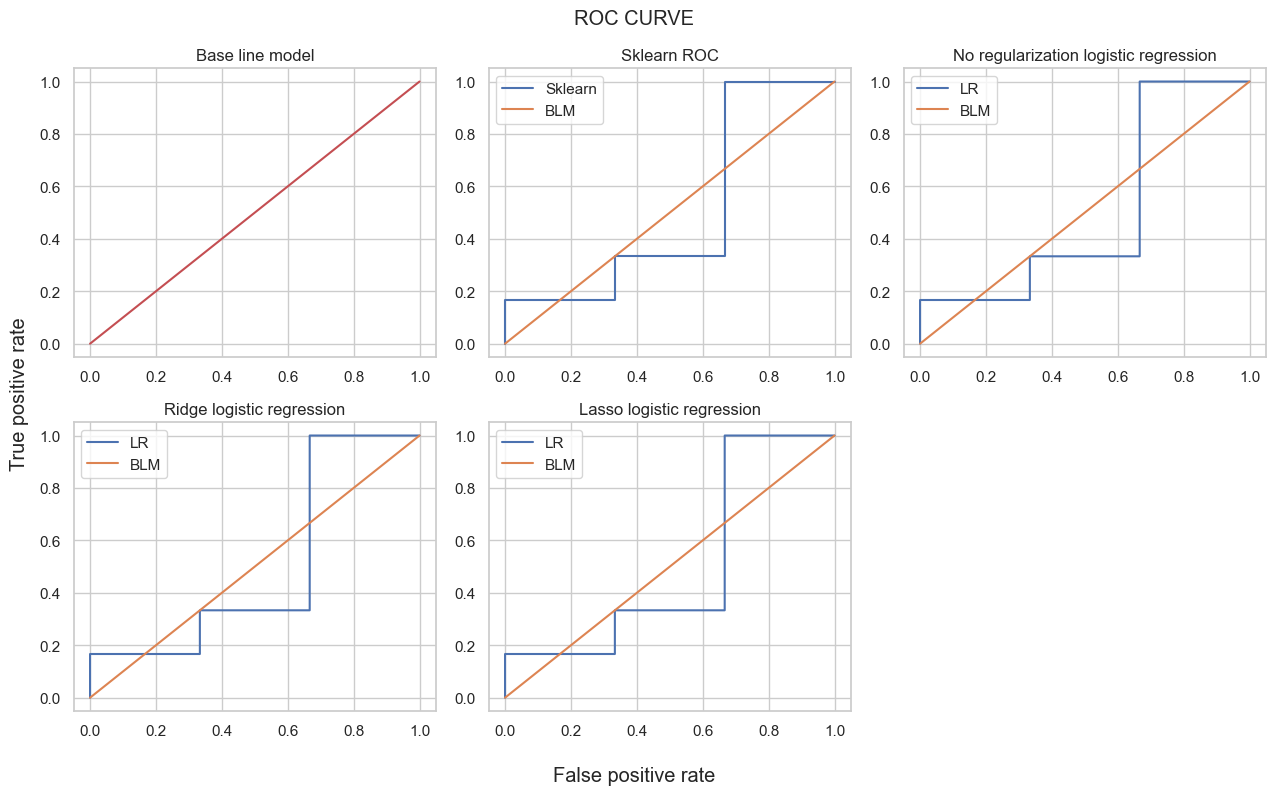

In [45]:
from sklearn import metrics
fig, axs = plt.subplots(2, 3,  constrained_layout=True)

fpr, tpr = list(), list()
ths = np.linspace(0,1,10000)

axs[0,0].plot(ths,ths, "r")
axs[0,0].set_title("Base line model")

y_pred = LR.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
axs[0,1].plot(fpr, tpr)
axs[0,1].plot(ths,ths)
axs[0,1].legend(["Sklearn", "BLM"])
axs[0,1].set_title("Sklearn ROC")


fpr, tpr = list(), list()
for th in ths:
    ypnr = predict(X_test, w_, th)
    cf= get_conf_matrix(ypnr, y_test)
    fpr.append(cf[2,1]/cf[2,0])
    tpr.append(cf[1,1]/cf[1,0])
axs[0,2].plot(fpr, tpr)
axs[0,2].plot(ths,ths)
axs[0,2].set_title("No regularization logistic regression")
axs[0,2].legend(["LR", "BLM"])

fpr, tpr = list(), list()
for th in ths:
    ypr = predict(X_test, wR, th)
    cf= get_conf_matrix(ypr, y_test)
    fpr.append(cf[2,1]/cf[2,0])
    tpr.append(cf[1,1]/cf[1,0])
axs[1,0].plot(fpr, tpr)
axs[1,0].plot(ths,ths)
axs[1,0].set_title("Ridge logistic regression")
axs[1,0].legend(["LR", "BLM"])

fpr, tpr = list(), list()
for th in ths:
    ypl = predict(X_test, wL, th)
    cf= get_conf_matrix(ypl, y_test)
    fpr.append(cf[2,1]/cf[2,0])
    tpr.append(cf[1,1]/cf[1,0])
axs[1,1].plot(fpr, tpr)
axs[1,1].plot(ths,ths)
axs[1,1].set_title("Lasso logistic regression")
axs[1,1].legend(["LR", "BLM"])

axs[1,2].set_axis_off()

fig.suptitle("ROC CURVE")
fig.set_size_inches(13,8)
fig.supxlabel('False positive rate')
fig.supylabel('True positive rate')
fig.tight_layout()
fig.savefig("ROC_curve")
